<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-New-Variables" data-toc-modified-id="Create-New-Variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create New Variables</a></span></li><li><span><a href="#Create-Kind-Column" data-toc-modified-id="Create-Kind-Column-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create Kind Column</a></span></li><li><span><a href="#Create-Acronym" data-toc-modified-id="Create-Acronym-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create Acronym</a></span></li><li><span><a href="#SharePoint-Migration-Capability" data-toc-modified-id="SharePoint-Migration-Capability-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SharePoint Migration Capability</a></span></li><li><span><a href="#Calculate-Ranking-for-Creation-and-Access" data-toc-modified-id="Calculate-Ranking-for-Creation-and-Access-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculate Ranking for Creation and Access</a></span></li><li><span><a href="#Basic-Plotting" data-toc-modified-id="Basic-Plotting-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Basic Plotting</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import textblob

#from __future__ import unicode_literals, absolute_import
#import nltk



In [24]:
dateCols = ['CreationTime', 'LastAccessTime','LastWriteTime']
df = pd.read_csv(r"C:\Users\stewartc\NSWGOV\OneDrive - NSWGOV\DataAnalysis\IS 20180511.csv", parse_dates=dateCols)
df.head()

,Path,Directory,Name,CreationTime,LastAccessTime,LastWriteTime,Extension,BaseName,B
0,G:\IS\IS - Shortcut.lnk,G:\IS,IS - Shortcut.lnk,2018-03-15 16:04:43,2018-11-05 09:34:20,2018-03-15 16:04:43,.lnk,IS - Shortcut,538
1,G:\IS\Records - Shortcut.lnk,G:\IS,Records - Shortcut.lnk,2017-03-20 17:29:05,2018-11-05 09:34:20,2017-03-21 16:28:14,.lnk,Records - Shortcut,2013
2,G:\IS\(C) SYSTEM - Shortcut.lnk,G:\IS,(C) SYSTEM - Shortcut.lnk,2016-08-04 13:52:29,2018-11-05 09:34:20,2016-08-04 13:52:29,.lnk,(C) SYSTEM - Shortcut,456
3,G:\IS\eforms sit - Shortcut.lnk,G:\IS,eforms sit - Shortcut.lnk,2017-03-05 09:47:35,2018-11-05 09:34:20,2017-03-05 09:47:35,.lnk,eforms sit - Shortcut,1795
4,G:\IS\(D) DOF BATCH 3 - Shortcut.lnk,G:\IS,(D) DOF BATCH 3 - Shortcut.lnk,2017-05-12 11:18:32,2018-11-05 09:34:20,2017-05-12 11:18:32,.lnk,(D) DOF BATCH 3 - Shortcut,385


In [9]:
df.to_feather(r"filelist")

In [2]:
df = pd.read_feather(f"filelist")

In [3]:
df.dtypes

Path                      object
Directory                 object
Name                      object
CreationTime      datetime64[ns]
LastAccessTime    datetime64[ns]
LastWriteTime     datetime64[ns]
Extension                 object
BaseName                  object
B                          int64
dtype: object

In [4]:
#Random Rows https://stackoverflow.com/questions/15923826/random-row-selection-in-pandas-dataframe

no_rows = 100

df.loc[np.random.choice(df.index, no_rows)]

,Path,Directory,Name,CreationTime,LastAccessTime,LastWriteTime,Extension,BaseName,B
137821,G:\IS\Records\Records-EH\Data\isys\shared02\Re...,G:\IS\Records\Records-EH\Data\isys\shared02\Re...,68360.pdf,2014-03-28 11:10:18,2016-05-18 10:37:19,2014-03-28 11:10:18,.pdf,68360,26145
74834,G:\IS\Plan_Services\AA_PDFs for clients (copie...,G:\IS\Plan_Services\AA_PDFs for clients (copie...,SB1820_63.pdf,2018-07-03 14:53:11,2018-07-03 14:53:12,2018-02-22 21:12:16,.pdf,SB1820_63,1271673
137580,G:\IS\Records\Records-EH\Data\isys\shared02\Re...,G:\IS\Records\Records-EH\Data\isys\shared02\Re...,box1.pdf,2014-01-24 15:25:20,2016-05-18 10:37:14,2014-01-24 15:25:20,.pdf,box1,13874
69552,G:\IS\Plan_Services\AA_PDFs for clients (copie...,G:\IS\Plan_Services\AA_PDFs for clients (copie...,Sarah Redfern High SB2486-260A.pdf,2010-01-07 16:45:44,2016-05-19 09:11:40,2010-01-07 16:44:04,.pdf,Sarah Redfern High SB2486-260A,690026
38556,G:\IS\Plan_Services\A - Rani to Check - (Engin...,G:\IS\Plan_Services\A - Rani to Check - (Engin...,54826sh1.pdf,2018-03-29 12:02:52,2018-03-29 12:02:52,2008-11-03 07:09:10,.pdf,54826sh1,2170859
36565,G:\IS\Plan_Services\zzz Nuala\Pesh - Final Che...,G:\IS\Plan_Services\zzz Nuala\Pesh - Final Che...,Upload for TC4 to TC25 with comments.xlsx,2018-02-21 11:42:26,2018-10-05 16:15:12,2018-02-21 11:44:09,.xlsx,Upload for TC4 to TC25 with comments,275141
107335,G:\IS\Plan_Services\AA_PDFs for clients (copie...,G:\IS\Plan_Services\AA_PDFs for clients (copie...,PC309_9.pdf,2018-08-03 17:16:24,2018-08-03 17:36:59,2018-02-03 13:56:06,.pdf,PC309_9,401173
65555,G:\IS\Plan_Services\AA_PDFs for clients (copie...,G:\IS\Plan_Services\AA_PDFs for clients (copie...,Gosford High SB639-182.pdf,2015-10-14 11:51:15,2016-05-19 09:09:13,2015-10-14 11:51:16,.pdf,Gosford High SB639-182,295028
87628,G:\IS\Plan_Services\AA_PDFs for clients (copie...,G:\IS\Plan_Services\AA_PDFs for clients (copie...,Lismore TAFE TC15-17.pdf,2013-04-06 12:17:24,2014-05-30 09:43:12,2013-04-06 12:19:54,.pdf,Lismore TAFE TC15-17,1250283
4197,G:\IS\Plan_Services\A_New Plans for TRIM\zzz C...,G:\IS\Plan_Services\A_New Plans for TRIM\zzz C...,Fixing of Steel Beams - RFI 257 (9).JPG,2017-12-20 08:53:27,2017-12-20 09:58:57,2004-02-08 16:31:36,.JPG,Fixing of Steel Beams - RFI 257 (9),152503


In [23]:
#!pip install -U feather-format

In [15]:
#df.to_feather(df)

# Create New Variables

In [5]:
#create depth of folders
df['depth'] = df['Path'].str.count(r'\\')

#convert lowercase of Extension
df['Extension'] = df['Extension'].str.lower()

#Rank Creation Times
df['CreationTimeRanked'] = df['CreationTime'].rank(ascending=1)
df['LastAccessTimeRanked'] = df['LastAccessTime'].rank(ascending=1)
df['LastWriteTimeRanked'] = df['LastWriteTime'].rank(ascending=1)

#Works out whether document was created in place or moved
df['OriginalLocation'] = np.where(df['CreationTime']<=df['LastWriteTime'], '1', '0')

In [6]:
df.head()

,Path,Directory,Name,CreationTime,LastAccessTime,LastWriteTime,Extension,BaseName,B,depth,CreationTimeRanked,LastAccessTimeRanked,LastWriteTimeRanked,OriginalLocation
0,G:\IS\IS - Shortcut.lnk,G:\IS,IS - Shortcut.lnk,2018-03-15 16:04:43,2018-11-05 09:34:20,2018-03-15 16:04:43,.lnk,IS - Shortcut,538,2,112507.0,141579.0,138248.0,1
1,G:\IS\Records - Shortcut.lnk,G:\IS,Records - Shortcut.lnk,2017-03-20 17:29:05,2018-11-05 09:34:20,2017-03-21 16:28:14,.lnk,Records - Shortcut,2013,2,65370.0,141579.0,92339.0,1
2,G:\IS\(C) SYSTEM - Shortcut.lnk,G:\IS,(C) SYSTEM - Shortcut.lnk,2016-08-04 13:52:29,2018-11-05 09:34:20,2016-08-04 13:52:29,.lnk,(C) SYSTEM - Shortcut,456,2,61279.0,141579.0,87372.0,1
3,G:\IS\eforms sit - Shortcut.lnk,G:\IS,eforms sit - Shortcut.lnk,2017-03-05 09:47:35,2018-11-05 09:34:20,2017-03-05 09:47:35,.lnk,eforms sit - Shortcut,1795,2,65338.0,141579.0,92254.0,1
4,G:\IS\(D) DOF BATCH 3 - Shortcut.lnk,G:\IS,(D) DOF BATCH 3 - Shortcut.lnk,2017-05-12 11:18:32,2018-11-05 09:34:20,2017-05-12 11:18:32,.lnk,(D) DOF BATCH 3 - Shortcut,385,2,65988.0,141579.0,92882.0,1


In [6]:
df.shape

(141648, 14)

In [9]:
df.head()

,Path,Directory,Name,CreationTime,LastAccessTime,LastWriteTime,Extension,BaseName,B,depth,CreationTimeRanked,LastAccessTimeRanked,LastWriteTimeRanked,OriginalLocation
0,G:\IS\IS - Shortcut.lnk,G:\IS,IS - Shortcut.lnk,2018-03-15 16:04:43,2018-11-05 09:34:20,2018-03-15 16:04:43,.lnk,IS - Shortcut,538,2,112507.0,141579.0,138248.0,1
1,G:\IS\Records - Shortcut.lnk,G:\IS,Records - Shortcut.lnk,2017-03-20 17:29:05,2018-11-05 09:34:20,2017-03-21 16:28:14,.lnk,Records - Shortcut,2013,2,65370.0,141579.0,92339.0,1
2,G:\IS\(C) SYSTEM - Shortcut.lnk,G:\IS,(C) SYSTEM - Shortcut.lnk,2016-08-04 13:52:29,2018-11-05 09:34:20,2016-08-04 13:52:29,.lnk,(C) SYSTEM - Shortcut,456,2,61279.0,141579.0,87372.0,1
3,G:\IS\eforms sit - Shortcut.lnk,G:\IS,eforms sit - Shortcut.lnk,2017-03-05 09:47:35,2018-11-05 09:34:20,2017-03-05 09:47:35,.lnk,eforms sit - Shortcut,1795,2,65338.0,141579.0,92254.0,1
4,G:\IS\(D) DOF BATCH 3 - Shortcut.lnk,G:\IS,(D) DOF BATCH 3 - Shortcut.lnk,2017-05-12 11:18:32,2018-11-05 09:34:20,2017-05-12 11:18:32,.lnk,(D) DOF BATCH 3 - Shortcut,385,2,65988.0,141579.0,92882.0,1


In [12]:
df.loc[df['OriginalLocation'] == 0]

,Path,Directory,Name,CreationTime,LastAccessTime,LastWriteTime,Extension,BaseName,B,depth,CreationTimeRanked,LastAccessTimeRanked,LastWriteTimeRanked,OriginalLocation,Kind,Acronym


In [11]:
df2 = df.groupby('Extension')


# Create Kind Column

Kind is created from Extension Column

In [7]:
df['Extension'].value_counts()

.pdf                 102632
.jpg                  12344
.xls                   7390
.doc                   5524
.dwg                   2433
.xlsx                  1453
.dgn                   1204
.tif                   1096
.pdfa                  1078
.ttd                    900
.txt                    853
.gif                    767
.docx                   452
.rtf                    381
.js                     357
.dxf                    270
.plt                    261
.csv                    250
.zip                    224
.html                   158
.log                    141
.dll                    138
.tr5                    113
.rpt                     86
.htm                     78
.exe                     74
.shx                     61
.png                     45
.tx                      43
.avi                     40
                      ...  
. rpt                     1
.pps                      1
.abk                      1
.008                      1
.$5$                

In [19]:
#df.drop(columns=['Kind'])

In [8]:
Kind = []

#Kind types adapted from https://docs.microsoft.com/en-us/windows/desktop/properties/building-property-handlers-user-friendly-kind-names
#Classifications adapted from https://en.wikipedia.org/wiki/List_of_file_formats

for row in df.Extension:
    #Categorise Documents
    #if row in ['.doc', '.docx', '.docm', '.pdf', '.pdfa', '.xls' , '.xlsx', '.ppt', '.pptx', '.txt', '.csv', '.rtf', '.html', '.htm']:
        #Kind.append('Document')
    #Categorise Miscellaneous
    if row in ['.alias', '.jnlp', '.lnk', '.appref-ms', '.url', '.sym', '.desktop', '.link', '.tr5']:
        Kind.append('Link')
    #Categorise Miscellaneous    
    elif row in ['.jpg','.png', '.gif', '.tif']:
        Kind.append('Picture')     
    #Categorise Program - added msi
    elif row in ['.exe','.dll', '.msi']:
        Kind.append('Program')     
    #Categorise Archive and Compressed
    elif row in ['.cab', '.?q?', '.7z', '.aac', '.ace', '.alz', '.apk', '.appx', '.at3', '.bke', '.arc', '.arj', '.ass', '.sas', '.b', '.ba', '.big', '.bin', '.bjsn', '.bkf', '.bz2', '.bld', '.c4', '.cab', '.cals', '.clipflair', '.cpt', '.sea', '.daa', '.deb', '.dmg', '.ddz', '.dpe', '.egg', '.egt', '.ezip', '.ecab', '.ess', '.flipchart', '.gho', '.ghs', '.gif', '.gz', '.ipg', '.jar', '.lawrence', '.lbr', '.lqr', '.lzh', '.lha', '.lzip', '.lz', '.lzo', '.lzma', '.lzx', '.mbw', '.mpq', '.bin', '.nth', '.osz', '.pak', '.par', '.par2', '.paf', '.pyk', '.pk3', '.pk4', '.rar', '.rags', '.rag', '.rpm', '.sen', '.sit', '.sitx', '.skb', '.szs', '.tar', '.tar.gz', '.tb', '.tib', '.uha', '.uue', '.viv', '.vol', '.vsa', '.wax', '.xz', '.z', '.zoo', '.zip']:
        Kind.append('Archive and compressed')     
    #Categorise Container
    elif row in ['.pst','.zip']:
        Kind.append('Container')     
    #Categorise Communications
    elif row in ['.eml','.msg']:
        Kind.append('Communications')     
    #Categorise Audio - replaces with sound and music
    #elif row in ['.wav','.wmv','.mp3']:
     #   Kind.append('Audio')     
    #Categorise Video
    elif row in ['.aaf', '.3gp', '.gif', '.asf', '.avchd', '.avi', '.bik', '.cam', '.collab', '.dat', '.dsh', '.dvr-ms', '.flv', '.m1v', '.m2v', '.fla', '.flr', '.sol', '.m4v', '.mkv', '.wrap', '.mng', '.mov', '.mpeg', '.mpg', '.mpe', '.thp', '.mp4', '.mxf', '.roq', '.nsv', '.ogg', '.rm', '.svi', '.smi', '.smk', '.swf', '.wmv', '.wtv', '.yuv', '.webm']:
        Kind.append('Video')     
    #Categorise Database
    elif row in ['.accde','.accdb']:
        Kind.append('Database')  
    #Categorise GIS
    elif row in ['.asc', '.apr', '.dem', '.e00', '.geojson', '.geotiff', '.gml', '.gpx', '.itn', '.mxd', '.ntf', '.ov2', '.shp', '.tab', '.worldtiff', '.dted', '.kml']:
        Kind.append('Geographic')  
    #Categorise Computer-aided design (CAD)
    elif row in ['.3dxml', '.3mf', '.acp', '.amf', '.aec', '.ar', '.art', '.asc', '.asm', '.bim', '.bin', '.brep', '.c3d', '.ccc', '.ccm', '.ccs', '.cad', '.catdrawing', '.catpart', '.catproduct', '.catprocess', '.cgr', '.ckd', '.ckt', '.co', '.drw', '.dft', '.dgn', '.dgk', '.dmt', '.dxf', '.dwb', '.dwf', '.dwg', '.easm', '.edrw', '.emb', '.eprt', '.escpcb', '.escsch', '.esw', '.excellon', '.exp', '.f3d', '.fcstd', '.fm', '.fmz', '.g', '.gbr', '.glm', '.grb', '.gtc', '.iam', '.icd', '.idw', '.ifc', '.iges']:
        Kind.append('Computer-aided Design')  
    #ADDITIONAL TYPES FROM DATA ENTRY
    #Categorise Audio Editing, Music Production
    elif row in ['.als', '.alc', '.alp', '.aup', '.band', '.cel', '.cpr', '.cwp', '.drm', '.dmkit', '.ens', '.grir', '.logic', '.mmr', '.mx6hs', '.npr', '.omf', '.omfi', '.rin', '.ses', '.sfl', '.sng', '.stf', '.snd', '.syn', '.flp', '.vcls', '.vsq', '.vsqx']:
        Kind.append('Audio Editing, Music Production')     
    #Categorize Biology
    elif row in ['.ab1', '.ace', '.asn.1', '.bam', '.bcf', '.bed', '.caf', '.embl', '.fasta', '.fastq', '.gcproj', '.genbank', '.gff', '.gtf', '.ncbi asn.1', '.nexus', '.nexml', '.nwk', '.pdb', '.phd', '.pln', '.sam', '.sbml', '.scf', '.sff', '.sra', '.stockholm', '.swiss-prot', '.vcf']:
        Kind.append('Biology')    
    #Categorise Biomedical imaging 
    elif row in ['.acq', '.adicht', '.bci2000', '.bdf', '.bkr', '.brik', '.cfwb', '.dcm', '.dicom', '.ecgml', '.edf', '.fef', '.gdf', '.gdf', '.gii', '.hdr', '.head', '.hl7', '.hl7aecg', '.img', '.mfer', '.mgh', '.mgz', '.minc', '.nifti', '.nii', '.nii.gz', '.openxdf', '.scp-ecg', '.sigif', '.vcf', '.wfdb', '.xdf', '.xdt']:
        Kind.append('Biomedical Imaging')    
    #Categorise Biometric Formats
    elif row in ['.cbf', '.ebf', '.cbfx', '.ebfx']:
        Kind.append('Biometric Formats')    
    #Categorise Ceramics glaze recipes
    elif row in ['.hgz', '.matrix', '.rcp', '.rcx']:
        Kind.append('Ceramics Glaze Recipes')
    #Categorise Chemistry
    elif row in ['.cml', '.mol', '.sd', '.sdf', '.dx', '.jdx', '.smi']:
        Kind.append('Chemistry')
    #Categorise Configurations, Metadata
    elif row in ['.css', '.xslt', '.xsl', '.tpl']:
        Kind.append('Configurations, Metadata')
    #Categorise Cursors
    elif row in ['.ani', '.cur', '.smes']:
        Kind.append('Cursors')
    #Categorise Cursors
    elif row in ['.ani', '.cur', '.smes']:
        Kind.append('Cursors')       
    #Categorise Database
    elif row in ['.4db', '.4dd', '.4dindy', '.4dindx', '.4dr', '.accdb', '.accde', '.adt', '.apr', '.box', '.chml', '.daf', '.dat', '.dat', '.db', '.db', '.dbf', '.egt', '.ess', '.eap', '.fdb', '.fdb', '.fp', '.fp3', '.fp5', '.fp7', '.frm', '.gdb', '.gtable', '.kexi', '.kexic', '.kexis', '.ldb', '.mda', '.mdb', '.adp', '.mde', '.mdf', '.myd', '.myi', '.ncf', '.nsf', '.ntf', '.nv2', '.odb', '.ora', '.pcontact', '.pdb', '.pdi', '.pdx', '.prc', '.sql', '.rec', '.rel', '.rin', '.sdb', '.sdf', '.sqlite', '.udl', '.wadata', '.waindx', '.wamodel', '.wajournal', '.wdb', '.wmdb']:
        Kind.append('Database')
    #Categorise Financial
    elif row in ['.myo', '.myob', '.tax', '.ynab']:
        Kind.append('Financial')
    #Categorise Document - removed csv, added onenote, added pdfa, added visio
    elif row in ['.0', '.1st', '.600', '.602', '.abw', '.acl', '.afp', '.ami', '.amigaguide', '.ans', '.asc', '.aww', '.ccf', '.cwk', '.dbk', '.dita', '.doc', '.docm', '.docx', '.dot', '.dotx', '.egt', '.epub', '.ezw', '.fdx', '.ftm', '.ftx', '.gdoc', '.html', '.hwp', '.hwpml', '.log', '.lwp', '.mbp', '.md', '.me', '.mcw', '.mobi', '.nb', '.nbp', '.neis', '.odm', '.odoc', '.odt', '.one', '.onetoc2','.osheet', '.ott', '.omm', '.pages', '.pap', '.pdax', '.pdf', '.pdfa', '.quox', '.radix-64', '.rtf', '.rpt', '.sdw', '.se', '.stw', '.sxw', '.tex', '.info', '.troff', '.txt', '.uof', '.uoml', '.via', '.vsd', '.vsdx', '.vsdm', '.vsdt', '.wpd', '.wps', '.wpt', '.wrd', '.wrf', '.wri', '.xhtml', '.xht', '.xml', '.xps']: 
        Kind.append('Document')
    #Categorise Spreadsheet - removed csv
    elif row in ['.123', '.ab2', '.ab3', '.aws', '.bcsv', '.clf', '.cell', '.gsheet', '.numbers', '.gnumeric', '.ods', '.ots', '.qpw', '.sdc', '.slk', '.stc', '.sxc', '.tab', '.txt', '.vc', '.wk1', '.wk3', '.wk4', '.wks', '.wks', '.wq1', '.xlk', '.xls', '.xlsb', '.xlsm', '.xlsx', '.xlr', '.xlt', '.xltm', '.xlw']:
        Kind.append('Spreadsheet')
    #Categorise Tabbed Data
    elif row in ['.tsv', '.csv', '.db', '.dif']:
        Kind.append('Tabbed Data')
    #Categorise Presentations
    elif row in ['.gslides', '.key', '.keynote', '.nb', '.nbp', '.odp', '.otp', '.pez', '.pot', '.pps', '.ppt', '.pptx', '.prz', '.sdd', '.shf', '.show', '.shw', '.slp', '.sspss', '.sti', '.sxi', '.thmx', '.watch']:
        Kind.append('Presentation')
    #Programming languages and scripts
    elif row in ['.ahk', '.applescript', '.as', '.au3', '.bat', '.bas', '.cljs', '.cmd', '.coffee', '.duino', '.egg', '.egt', '.erb', '.hta', '.ibi', '.ici', '.ijs', '.ipynb', '.itcl', '.js', '.jsfl', '.lua', '.m', '.mrc', '.ncf', '.nuc', '.nud', '.nut', '.php', '.php?', '.pl', '.pm', '.ps1', '.ps1xml', '.psc1', '.psd1', '.psm1', '.py', '.pyc', '.pyo', '.r', '.rb', '.rdp', '.sb2', '.scpt', '.scptd', '.sdl', '.sh', '.syjs', '.sypy', '.tcl', '.vbs', '.xpl', '.ebuild']:
        Kind.append('Programming languages and scripts')
    #Project management software
    elif row in ['.mpp']:
        Kind.append('Project management software')
    #Webpage Static
    elif row in ['.htm', '.html', '.xhtml', '.xht', '.mht', '.mhtml', '.maff']:
        Kind.append('Webpage - Static')
    #Webpage Dynamic
    elif row in ['.asp', '.aspx', '.adp', '.bml', '.cfm', '.cgi', '.ihtml', '.jsp', '.lasso', '.pl', '.php', '.rna', '.r', '.rnx', '.shtml', '.stm']:
        Kind.append('Webpage - Dynamic')
    #Virtual Machine
    elif row in ['.vfd', '.vhd', '.vud', '.vmc', '.vsv', '.emc', '.esx', '.gsx', '.log', '.vmdk, dsk', '.nvram', '.vmem', '.vmsd', '.vmsn', '.vmss', '.std', '.vmtm', '.vmx', '.fg', '.vmxf', '.virtualbox', '.vdi', '.parallels', '.hdd', '.pvs', '.sav', '.qemu', '.cow', '.qcow', '.qcow2', '.qed']:
        Kind.append('Virtual Machines')
    #Video game storage media
    elif row in ['.a26', '.a52', '.a78', '.lnx', '.jag', '.j64', '.bin', '.gcm', '.nds', '.3ds', '.cia', '.gb', '.gbc', '.gba', '.gba', '.sav', '.sgm', '.n64', '.v64', '.z64', '.u64', '.use', '.jap', '.pal', '.eur', '.bin', '.pj', '.nes', '.fds', '.jst', '.fc0', '.fc1', '.fc2', '.fc3', '.fc4', '.fc5', '.fc6', '.fc7', '.fc8', '.fc9', '.gg', '.sms', '.sg', '.bin', '.smd', '.32x', '.smc', '.78', '.sfc', '.fig', '.srm', '.zst', '.frz', '.pce', '.npc', '.ngp', '.ngc', '.vb', '.int', '.min', '.vec', '.bin', '.ws', '.wsc', '.tzx', '.tap', '.z80', '.sna', '.dsk', '.tap', '.t64', '.d64', '.crt', '.adf', '.adz', '.dms']:
        Kind.append('Video game storage media')
    #Video editing, production
    elif row in ['.fcp', '.mswmm', '.ppj', '.prproj', '.imovieproj', '.veg', '.veg-bak', '.suf', '.wlmp', '.kdenlive', '.vpj', '.motn', '.imoviemobile']:
        Kind.append('Video editing, production')
    #Tracker modules & Related
    elif row in ['.mod', '.mt2', '.s3m', '.xm', '.it', '.nsf', '.midi', '.mid', '.ftm']:
        Kind.append('Tracker modules & Related')
    #Temporary Files
    elif row in ['.temp', '.tmp']:
        Kind.append('Temporary files')
    #Password FIles
    elif row in ['.name', '.bpw', '.kdb', '.kdbx']:
        Kind.append('Password Files')
    #Desktop Publishing
    elif row in ['.ai', '.ave', '.zave', '.cdr', '.chp', '.pub', '.sty', '.cap', '.cif', '.vgr', '.frm', '.cpt', '.dtp', '.gdraw', '.ildoc', '.indd', '.psd', '.mcf', '.pdf', '.pmd', '.ppp', '.pub', '.qxd', '.fm', '.sla', '.scd', '.wlmp']:
        Kind.append('Desktop Publishing')
    #Font Files
    elif row in ['.abf', '.afm', '.bdf', '.bmf', '.fnt', '.fon', '.mgf', '.otf', '.pcf', '.ps', '.pfa', '.pfb', '.pfm', '.afm', '.fond', '.sfd', '.snf', '.tdf', '.tfm', '.ttf', '.ttc', '.ufo', '.woff']:
        Kind.append('Font')
    #Graphics - Raster Graphics
    elif row in ['.ase', '.art', '.blp', '.bmp', '.bti', '.cd5', '.cit', '.cpt', '.cr2', '.csp', '.cut', '.dds', '.dib', '.djvu', '.egt', '.exif', '.gif', '.gpl', '.grf', '.icns', '.ico', '.iff', '.ilbm', '.lbm', '.jng', '.jpg', '.jpeg', '.jfif', '.jp2', '.jps', '.lbm', '.max', '.miff', '.mng', '.msp', '.nitf', '.otb', '.pbm', '.pc1', '.pc2', '.pc3', '.pcf', '.pcx', '.pdn', '.pgm', '.pi1', '.pi2', '.pi3', '.pict, pct', '.png', '.pnm', '.pns', '.ppm', '.psb', '.psd, pdd', '.psp', '.px', '.pxm', '.pxr', '.qfx', '.raw', '.rle', '.sct', '.sgi', '.rgb', '.int', '.bw', '.tga', '.targa', '.icb', '.vda', '.vst', '.pix', '.tif', '.tiff', '.ep', '.vtf', '.xbm', '.xcf', '.xpm', '.zif']:
        Kind.append('Graphics - Raster Graphics')
    #Graphics - Vector Graphics
    elif row in ['.3dmf', '.3dm', '.3mf', '.3ds', '.abc', '.ac', '.amf', '.an8', '.aoi', '.asm', '.b3d', '.blend', '.block', '.bmd3', '.bdl', '.bmd4', '.brres', '.c4d', '.cal3d', '.ccp4', '.cfl', '.cob', '.core3d', '.ctm', '.dae', '.dff', '.dpm', '.dts', '.egg', '.fact', '.fbx', '.g', '.glm', '.iob', '.jas', '.lwo', '.lws', '.lxf', '.lxo', '.ma', '.max', '.mb', '.md2', '.md3', '.md5', '.mdx', '.mesh', '.mesh', '.mm3d', '.mpo', '.mrc', '.nif', '.obj', '.off', '.ogex', '.ply', '.prc', '.prt', '.pov', '.r3d', '.rwx', '.sia', '.sib', '.skp', '.sldasm', '.sldprt', '.smd', '.u3d', '.vim', '.vrml97', '.vue', '.vwx', '.wings', '.w3d', '.x', '.x3d', '.z3d']:
        Kind.append('Graphics - Vector Graphics')
    #Generic file extensions - Binary files
    elif row in ['.bak', '.bk', '.bin', '.dat', '.dsk', '.raw']:
        Kind.append('Generic file extensions - Binary files')
    #Sound and Music
    elif row in ['.8svx', '.16svx', '.aif', '.aiff,', '.aifc', '.au', '.bwf', '.cdda', '.raw', '.wav', '.ra', '.rm', '.flac', '.la', '.pac', '.ape', '.ofr', '.ofs', '.off', '.rka', '.shn', '.tak', '.tta', '.wv', '.wma', '.brstm', '.dts', '.dtshd', '.dtsma', '.ast', '.aw', '.psf']:
        Kind.append('Sound and music')
    #loss audio
    elif row in ['.amr', '.mp1', '.mp2', '.mp3', '.spx', '.gsm', '.wma', '.aac', '.mpc', '.vqf', '.ots', '.swa', '.vox', '.voc', '.dwd', '.smp', '.ogg']:
        Kind.append('Lossy Audio')
    #Source code for computer programs
    elif row in ['.ada', '.adb', '.2.ada', '.ads', '.1.ada', '.asm', '.s', '.bas', '.bb', '.bmx', '.c', '.clj', '.cls', '.cbl', '.cob', '.cpp', '.cc', '.cxx', '.c', '.cbp', '.cs', '.csproj', '.d', '.dba', '.dbpro123', '.e', '.efs', '.egt', '.el', '.for', '.ftn', '.f', '.f77', '.f90', '.frm', '.frx', '.fth', '.ged', '.gm6', '.gmd', '.gmk', '.gml', '.go', '.h', '.hpp', '.hxx', '.hs', '.i', '.inc', '.java', '.l', '.lgt', '.lisp', '.m', '.m', '.m', '.m4', '.ml', '.msqr', '.n', '.nb', '.p', '.pas', '.pp', '.p', '.php', '.php3', '.php4', '.php5', '.phps', '.phtml', '.pisrc', '.piv', '.pl', '.pm', '.pli', '.pl1', '.prg', '.pro', '.pol', '.py', '.r', '.red', '.reds', '.rb', '.resx', '.rc', '.rc', '.rkt', '.rktl', '.scala', '.sci', '.sce', '.scm', '.sd7', '.skb', '.skc', '.skd', '.skf', '.skg', '.ski', '.skk', '.skm', '.sko', '.skp', '.skq', '.sks', '.skt', '.skz', '.sln', '.spin', '.stk', '.swg', '.tcl', '.vap', '.vb', '.vbg', '.vbp', '.vip', '.vbproj', '.vcproj', '.vdproj', '.xpl', '.xq', '.xsl', '.y']:
        Kind.append('Source code for computer programs')
         
    else:
        Kind.append('')

df['Kind'] = Kind

In [9]:
df['Kind'].value_counts()

Document                                  111333
Picture                                    14252
Spreadsheet                                 8861
Computer-aided Design                       3933
                                            1671
Programming languages and scripts            358
Tabbed Data                                  250
Archive and compressed                       226
Program                                      212
Link                                         153
Video                                        101
Webpage - Static                             100
Presentation                                  40
Desktop Publishing                            32
Graphics - Raster Graphics                    31
Generic file extensions - Binary files        26
Configurations, Metadata                      21
Communications                                16
Database                                      12
Project management software                    7
Font                

# Create Acronym

In [7]:
import re 
regex = re.compile(r'([A-Z]{2,})')

In [1]:
df['Text_Date'] = df['BaseName'].str.findall(r"(?ms)\|(\d\d)(\d\d)(\d\d)\||\|(\d{1,2})[\|/\-](\d{1,2})[\|/\-](\d{2,4})\||\|(\d*)\s*(\w+)\s*(\d{4})\|")


NameError: name 'df' is not defined

In [10]:
df['Acronym'] = df['BaseName'].str.findall(r'(?:((?<=\.|\s)[A-Z]\.)+|([A-Z]{2,}))')

In [11]:
df.head()

,Path,Directory,Name,CreationTime,LastAccessTime,LastWriteTime,Extension,BaseName,B,depth,CreationTimeRanked,LastAccessTimeRanked,LastWriteTimeRanked,OriginalLocation,Kind,Acronym
0,G:\IS\IS - Shortcut.lnk,G:\IS,IS - Shortcut.lnk,2018-03-15 16:04:43,2018-11-05 09:34:20,2018-03-15 16:04:43,.lnk,IS - Shortcut,538,2,112507.0,141579.0,138248.0,1,Link,"[(, IS)]"
1,G:\IS\Records - Shortcut.lnk,G:\IS,Records - Shortcut.lnk,2017-03-20 17:29:05,2018-11-05 09:34:20,2017-03-21 16:28:14,.lnk,Records - Shortcut,2013,2,65370.0,141579.0,92339.0,1,Link,[]
2,G:\IS\(C) SYSTEM - Shortcut.lnk,G:\IS,(C) SYSTEM - Shortcut.lnk,2016-08-04 13:52:29,2018-11-05 09:34:20,2016-08-04 13:52:29,.lnk,(C) SYSTEM - Shortcut,456,2,61279.0,141579.0,87372.0,1,Link,"[(, SYSTEM)]"
3,G:\IS\eforms sit - Shortcut.lnk,G:\IS,eforms sit - Shortcut.lnk,2017-03-05 09:47:35,2018-11-05 09:34:20,2017-03-05 09:47:35,.lnk,eforms sit - Shortcut,1795,2,65338.0,141579.0,92254.0,1,Link,[]
4,G:\IS\(D) DOF BATCH 3 - Shortcut.lnk,G:\IS,(D) DOF BATCH 3 - Shortcut.lnk,2017-05-12 11:18:32,2018-11-05 09:34:20,2017-05-12 11:18:32,.lnk,(D) DOF BATCH 3 - Shortcut,385,2,65988.0,141579.0,92882.0,1,Link,"[(, DOF), (, BATCH)]"


In [13]:
df.dtypes

Path                            object
Directory                       object
Name                            object
CreationTime            datetime64[ns]
LastAccessTime          datetime64[ns]
LastWriteTime           datetime64[ns]
Extension                       object
BaseName                        object
B                                int64
depth                            int64
CreationTimeRanked             float64
LastAccessTimeRanked           float64
LastWriteTimeRanked            float64
OriginalLocation                object
Acronym                         object
dtype: object

In [17]:
for item in df['Acronym']: print (item)

['IS']
[]
['SYSTEM']
[]
['DOF', 'BATCH']
[]
[]
['ADS']
[]
['SIRA']
['SOH']
['POLICY']
[]
['NSW']
[]
['RSL', 'LC']
['DM', 'QA']
[]
['JIRA']
['TRIM']
[]
['GA']
['PDF']
['PDF']
['FA']
[]
['CD']
[]
['CD']
[]
['CD']
['CD']
['CD']
['CD', 'IS']
['CD']
['CD', 'IS']
[]
[]
['GOVERNMENT', 'HOUSE']
['CD', 'CD']
['CD', 'CD']
['CD', 'CD']
['PDF', 'PDF']
['CD']
['CD']
['CDH']
['PDF', 'CD']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['PDF', 'CD']
['SCAN', 'SCAN']
[]
['CD']
['CD']
['CD']
[]
['SCAN', 'SCAN']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['IT', 'GRR']
['IT', 'GRR']
['IT', 'GRR']
['IT', 'GRR']
['IT', 'GRR']
['IT', 'GRR']
['IT', 'GRR']
['IT', 'GRR']
['IT', 'GRR']
['IT', 'GRR']
['IT', 'GRR']
['GAO']
[]
['SAI', 'AS']
['GAO']
['SAI', 'AS']
[]
['OHS']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['FSA']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['GRR']
[]
[]
[

['DCP']
['DCP']
['DCP']
[]
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
[]
[]
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
[]
[]
[]
[]
[]
['DCP']
['DCP']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
[]
[]
[]
[]
['DCP']
[]
[]
[]
[]
['DCP

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
[]
[]
[]
[]
[]
[]
[]
[]
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


[]
[]
[]
[]
[]
['DCP']
['CSB', 'TEXT', 'FA']
['CSB', 'COVER', 'FA']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['DCP']
['DCP']
[]
['DCP']
[]
[]
[]
[]
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
[]
['TRAKVALS']
[]
['DCP']
['EW']
['NS']
['NS']
['EW']
['EW']
['EW']
['EW']
['NS']
['NS']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['DCP']
['DCP']
[]
[]
[]
[]
[]
[]
[]
['DCP']
['DCP']
['DCP']
['DCP']
[]
[]
[]
['DCP']
[]
[]
[]
[]
[]
[]
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
['DCP']
[]
[]
[]
[]
['DCP']
[]
[]
[]
['DSC']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['DSC']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['DCP']
['DCP']
['DSC']
['DSC']
['DSC']
['DSC']
['DSC']
['DSC']
['DSC']
['DSC']
['DSC']
['DSC']
['DSC

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['SSCS']
['SSCS']
['SSCS']
['SSCS']
['SSCS']
['SSCS']
['SSCS']
['SSCS']
['SSCS']
['SSCS']
['SSCS']
['SSCS']
['SSCS']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['

[]
[]
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
['TENDER', 'CONST']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['CHEC']
[]
['DA']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['BCA']
['DA']
['DA']
['DA']
['DA']
[]
['DET', 'SCS']
['CHEC']
['CHEC']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


[]
[]
[]
[]
[]
[]
[]
[]
[]
['HS']
['AMU']
[]
[]
[]
[]
[]
[]
['CASINO', 'DWG', 'GA', 'SITE']
['CASINO', 'DWG', 'GA', 'BLOCK', 'PLAN']
['CASINO', 'DWG', 'GA', 'BLOCK', 'PLAN']
['CASINO', 'DWG', 'GA', 'BLOCK', 'RCP']
['CASINO', 'DWG', 'GA', 'BLOCK', 'RCP']
['CASINO', 'DWG', 'GA', 'ELEV', 'LAB']
['CASINO', 'DWG', 'GA', 'ELEV', 'LAB']
['CASINO', 'DWG', 'GA', 'ELEV', 'LAB']
['CASINO', 'DWG', 'GA', 'ELEV', 'LAB']
['CASINO', 'DWG', 'GA', 'ELEV', 'LAB']
['CASINO', 'DWG', 'GA', 'ELEV', 'PREP']
['CASINO', 'DWG', 'PREP']
['MD', 'COVER', 'TENDER']
['MD', 'NOTES', 'TENDER']
['MD', 'DETAILS', 'TENDER']
['MD', 'DETAILS', 'TENDER']
['MD', 'DETAILS', 'TENDER']
['MD', 'AIR', 'DIAG', 'BLK', 'TENDER']
['MD', 'AIR', 'DIAG', 'BLK', 'TENDER']
['MD', 'BLK', 'GRD', 'TENDER']
['MD', 'BLK', 'ST', 'TENDER']
['MD', 'BLK', 'GRD', 'TENDER']
['MD', 'BLK', 'ST', 'TENDER']
['MD', 'BLK', 'GRD', 'TENDER']
['MD', 'BLK', 'CD', 'SECT', 'TENDER']
['MD', 'BLK', 'CD', 'TENDER']
['MD', 'BLK', 'GRD', 'TENDER']
['MD', 'BLK', 'GRD'

[]
['CCTV']
[]
['VMD']
[]
[]
[]
[]
['PC']
['MATV']
['UPS', 'UPS']
[]
[]
[]
[]
[]
[]
[]
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA', 'JH']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
['CA']
[]
['EH']
[]
['EH', 'FC']
['FFH', 'FFH']
[]
[]
['EH', 'FC']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['JHC']
[]
[]
[]
[]
['PPA', 'AD']
['PPA', 'AD']
['PPA', 'AD']
['PPA', 'AD']
['PPA', 'AD']
['PPA', 'AD']
['PPA', 'AD']
[]
[]
[]
[]
[]
[]
[]
[]
['CCC']
['INT', 'BA', 'PDF']
['INT', 'BA', 'PDF']
['INT', 'BB', 'PDF']
['INT', 'BB', 'PDF']
['INT', 'BCD', 'PDF']
['INT', 'BCD', 'PDF']
['INT', 'BE', 'PDF']
['INT', 'BE', 'PDF']
['INT', 'BF', 'PDF']
['INT', 'BF', 'PDF']
['INT',

['IL']
['ASS', 'MAN']
['AU', 'CI', 'HIC']
['AU', 'CI', 'HPAS']
['AU', 'CI', 'HUB', 'CI', 'HIC']
['CI', 'CC']
['CI', 'VLU']
['MC', 'MC']
['MC', 'MGMT']
['PSA', 'PSA']
[]
[]
[]
[]
[]
[]
['ASS', 'MAN']
['ASS', 'MAN']
['DGS', 'QIG']
[]
[]
['DES']
['DES']
['DGS']
['NP', 'QIG']
['NP']
['NP']
['NP']
['NP']
[]
['SONY', 'DVD', 'VCR']
['UDS', 'QS']
['UDS', 'UDS', 'UG']
['UDS', 'PB']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['TFT', 'LCD', 'MATV']
['AMIS', 'PA']
[]
['AMIS', 'PA']
['AMIS']
['AMIS']
['AMIS']
['ASS', 'MAN']
['DPJ']
['IKUSI', 'TAL', 'CATV']
['MCP']
['BW']
['MV', 'IM', 'EN']
[]
['TDF']
['TSI']
['VM']
['VS']
[]
['VAC', 'PLUGPACK']
[]
[]
['ASS', 'MAN']
['EX', 'RT']
[]
['HBCR']
['IPCR']
[]
['VDC', 'PSU']
[]
['PDM']
['PDM', 'PDM']
['MCS']
['MCS']
[]
['PS', 'EDC']
['PS', 'EDC']
['RS']
['TPS']
['TPS', 'SW', 'BD']
['TPS', 'SWBD']
['TPS', 'SWME', 'HOBT']
['NEC']
['NEC', 'LCD']
[]
['TV']
[]
[]
[]
[]
[]
['UTP']
[]
['UTP']
['TCA']
[]
[]
['COVER']
['OV', 'SITE']
['SITE']
['DEMO']
[]
['PLANT']
['ROOF']
['F

['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
['HD']
[]
[]
[]
['SCCC']
['SCCC']
['SCCC']
['SCCC']
['LD', 'SITE', 'PLAN']
['LD', 'ENTRANCE', 'AND', 'CARPARK']
['LD', 'WOMENS', 'MINIMUM']
['LD', 'CLINIC', 'RECEPTION', 'CHAPEL']
['LD', 'VISITS']
['LD', 'MENS', 'MINIMUM']
['LD', 'KITCHEN', 'WORKSHOP', 'PROGRAMS']
['LD', 'MENS', 'MAX', 'PROTECTION']
['LD', 'PLAYING', 'FIELD', 'AND', 'GYM']
['LD', 'NORTH', 'ENTRANCE']
['SCCC']
['SCCC']
['SCCC']
['SCCC']
['SCCC']
['SCCC', 'SCHEDULES']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['SCCC']
[]
[]
[]

['EPPING', 'BOYS', 'HIGH', 'SCHOOL', 'AS', 'BUILT', 'DRAWING']
['AMU', 'BHS']
['EVANS', 'RIVER', 'DWG', 'GA', 'SITE']
['EVANS', 'RIVER', 'DWG', 'GA', 'BLOCK', 'PLAN']
['EVANS', 'RIVER', 'DWG', 'GA', 'BLOCK', 'PLANS']
['EVANS', 'RIVER', 'DWG', 'GA', 'BLOCK', 'RCP']
['EVANS', 'RIVER', 'DWG', 'GA', 'ELEV', 'PR']
['EVANS', 'RIVER', 'DWG', 'GA', 'ELEV', 'PR']
['EVANS', 'RIVER', 'DWG', 'GA', 'ELEV', 'PR']
['EVANS', 'RIVER', 'DWG', 'GA', 'ELEV', 'PR']
['EVANS', 'RIVER', 'DWG', 'GA', 'ELEV', 'PR']
['AS', 'BUILTS', 'EVANS', 'RIVER']
[]
[]
[]
[]
['OLA']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['AI']
['AI']
['AI']
['HS', 'WAE']
['AI']
['AI']
['AI']
['HS', 'WAE']
[]
['ASWC']
[]
['DM']
['DRS']
[]
['EL']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['FLS']
['FNT']
[]
['IWB']
[]
[]
[]
[]
[]
[]
['RD']
['RD']
[]
[]
[]
['SEC']
['SGN']
['TB']
['TS']
['TS']
[]
[]
[]
[]
[]
[]
[]
[]
['WIND']
[]
[]
[]
[]
['GRAFTON']
['GRAFTON']
['GRAFTON', 'EO']
['GRAFTON', 'EO']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

['COLOURS', 'AND', 'FINISHES', 'SCHEDULE']
['FFE', 'SCHEDULE']
['LIFT']
['APPENDICES', 'TITLE']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['MELVILLE', 'DWG', 'GA', 'SITE']
['MELVILLE', 'DWG', 'GA', 'PLAN']
['MELVILLE', 'DWG', 'GA', 'PLAN']
['MELVILLE', 'DWG', 'GA', 'RCP']
['MELVILLE', 'DWG', 'GA', 'ELEV', 'LAB']
['MELVILLE', 'DWG', 'GA', 'ELEV', 'LAB']
['MELVILLE', 'DWG', 'GA', 'ELEV', 'LAB']
['MELVILLE', 'DWG', 'GA', 'ELEV', 'LAB']
['MELVILLE', 'DWG', 'GA', 'ELEV', 'LAB']
['MELVILLE', 'DWG', 'GA', 'ELEV', 'PREP']
['AB']
['AB']
['AB']
['AB']
[]
['AB']
['AB']
['AB']
['AB']
[]
[]
[]
[]
[]
['COVER', 'SHEET']
['PART', 'SITE', 'SETOUT', 'PLAN']
['SITE', 'PLAN', 'STAFF', 'PARKING']
['SITE', 'PLAN']
['FLOOR', 'PLAN']
['ELEVATIONS']
['SECTIONS']
['CEILIING', 'PLAN']
['DETAIL']
['DETAIL']
['DETAIL']
['SECTIONS']
['SECTIONS']
['DETAILS']
['STAGE', 'DETAILS']
['WINDOW', 'SCHEDULES']
['DOOR', 'WINDOW', 'SCHEDULES']
['WET', 'AREA', 'DETAILS']
['WET', 'AREA', 'DETAILS']
['FURNITURE', 'PLAN']
['COVERED', 'ROOF']

['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['SD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['CD']
['ECOVER']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['ED']
['ED']
['ED']
['ED']
['ED']
[]
[]
[]
[]
[]
[]
[]
['KD']
['KD']
['KD']
['KD']
['KD']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
['MD']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
[]
['SITE']
['SITE']
['SITE']
['SITE']
['SITE']
['SITE']
[]
['ELEV', 'NORTH']
['ELEV', 'NORTH']
['ELEV', 'NORTH']
['LINK']
['ELEV']
['LINK']
['SEC']
[]
['LINK', 'SECTIONS']
['LINK']
['ELEV']
['SEC']
['BORD']
[]
['ELEV']
['SEC']
[]
['ELEV']
['SEC']
[]
['ELEV']
['ELEV', 'NORTH', 'SOUTH']
['SEC']
[]
['ELEV']
['ELEV']
[]
['SEC']
['SITE']
['SURVEY']
['WET']
['WET']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
['RD']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['ISSUE']
['ISSUE']
['ISSUE']
['ISSUE']
['ISSUE']
['ISSUE']
['ISSUE']
['ISSUE']
['ISSUE'

['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['PL']
['GAO', 'GRR']
['GAO', 'GRR']
[]
[]
[]
[]
['WD']
[]
[]
[]
[]
['SW']
[]
[]
[]
[]
[]
[]
['EW']
['SW']
['SW']
[]
[]
[]
[]
[]
[]
[]
['SW']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['SW']
[]
[]
[]
[]
[]
[]
[]
['CHC']
[]
[]
['CHC']
[]
['CSB']
['CHC']
['CSB']
['CHC']
['CSB', 'SW']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB']
['CSB', 'WAE']
['CSB']
['CSB']
['CSB', 'WAE']
['CSB', 'WAE']
['CSB', 'WAE']
['MBH', 'WAE']
['MBH', 'WAE']
['CSB', 'WAE']
['MBH', 'WAE']
['MHU']
['MHU', 'SW']
['MBH', 'WAE']
['MHU']
['MHU']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['SW']
['SW']
['TD']
['TD']
['TD']
['TD', 'SW']
[

[]
[]
[]
[]
[]
['JIRA']
[]
[]
['TAFE']
['TRIM']
['TRIM']
[]
[]
['ASI']
[]
[]
[]
[]
[]
[]
['TRIM']
['JIRA']
[]
['PUBLIC', 'WORKS', 'MICROFILM']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['IMP']
[]
['PL']
[]
['GAO']
[]
[]
['PDF', 'SASIS']
[]
[]
[]
[]
[]
[]
['SASIS']
['SASIS']
['SASIS']
['SASIS']
['SASIS']
[]
[]
['SASIS']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['TRIM']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['TRIM']
[]
[]
['PDF', 'TRIM']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['DRAFT']
[]
[]
['PDF']
[]
[]
['PD', 'TRIM']
['TRIM']
['TRIM']
[]
['TRIM']
['PDF']
['DSTA']
['DSTA']
['DTSA', 'EFT']
['EFT']
[]
[]
[]
[]
['AREV']
['INSTRUCTIONS', 'ON', 'HOW', 'TO', 'SAVE', 'AREV', 'TO']
[]
[]
[]
['ISP']
['DO', 'NOT', 'USE', 'ASP']
['ISI']
[]
[]
[]
['PLAN', 'EXTERNAL', 'CHARGE

['BOX']
['BOX']
['BATCH', 'RESCANS', 'BOX']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['BATCH', 'RESCANS']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['BATCH']
['BATCH', 'RESCANS']
['MH', 'MH']
['AB', 'UD']
[]
['MH', 'MH']
['MH', 'MH']
['MH', 'MH']
['UD', 'UD']
[]
['MH', 'AB', 'UD']
['MH', 'MH']
[]
[]
['AB', 'UD']
['UD', 'UD']
['MH', 'MH']
['MH', 'MH']
[]
[]
[]
['PH', 'PH']
['PH', 'PH']
[]
['PH', 'PH']
['SARAH', 'PH', 'PH']
['QA', 'PH', 'PH']
['QA', 'PH', 'PH']
['PH', 'PH']
['PH', 'PH']
['PH', 'PH']
['PH', 'PH']
['PH', 'PH']
['PH', 'PH']
['PH', 'PH']
['PH', 'PH']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC'

[]
[]
[]
[]
[]
[]
[]
[]
['GRR']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['FULL']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC

[]
[]
[]
[]
[]
[]
[]
[]
['GRR']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['SH']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['SH']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['SH']
['SH']
['SH']
[]
['SH']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['SH']
['SH']
['SH']
['SH']
['SH']
['SH']
['SH']
['SH']
['SH']
['SH']
['SH']
['SH']
['SH']
['SH']
['SH']
['SH']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['SH']
[]
[]
[]
[]

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']

['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']

['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']

['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']

['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']

['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']
['MH']

['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']

['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']

['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']

['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
['PH']
[]
[]
['SB']
['SB']
['MISC']
['SB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB

['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['MISC']
['MISC']
['MISC']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['PB']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']

['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
[]
[]
[]
[]
[]
[]
['WB', 'MISC']
['WB', 'MISC']
['WB', 'MISC']
['WB', 'MISC']
['WB', 'MISC']
['WB', 'MISC']
['WB', 'MISC']
['WB', 'MISC']
['WB', 'MISC']
['WB', 'MISC']
['WB']
['WB']
['WB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['MISC']
['MISC']
['MISC']
['MISC']
[]
[]
[]
[]
[]
[]
[]
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['MISC']
['PB']
['PB']
['PB']
['PB']
['PB']
['P

[]
[]
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PB']
['PB']
['PC']
['PC']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PB']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PB']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']


['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
[]
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['S

['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']

['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']

['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']

['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']

['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']

['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['PLAN']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB

['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']

['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']

['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']

['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
[]
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SSP', 'SB']
['SSP', 'SB']
['SSP', 'SB']
['SSP', 'SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['S

['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['PU', 'SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SSP', 'SB']
['SSP', 'SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']


['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
[]
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SSP', 'SB']
['SSP', 'SB']
['SSP', 'SB']
['SSP', 'SB']
['SSP', 'SB']
['SSP', 'SB']
['SSP', 'SB']
['SB']
['PS', 'SB']
['PS', 'SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
[]
['SB']
['SB']
['SB']
['SB']
['

['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']

['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['SB']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['T

['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'SB']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['T

['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', 'TC']
['TAFE', '

['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']

['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']

['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']

['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']

['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']

['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']

['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']
['TC']

['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
[]
[]
[]
[]
[]
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC'

['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC', 'CW']
['JJC'

['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['CW']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']

['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']

['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']

['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']

['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']

['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']

['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PC']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']
['PLAN']

['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
[]
['LEGAL']
[]
['LEGAL']
[]
[]
['LEGAL']
['LEGAL']
['LEGAL']
[]
['LEGAL']
[]
['LEGAL']
['LEGAL']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['PARRAHOS']
['MARCUSCL']
['PRINCEHE']
['FOI']
[]
['FOI']
['LEGAL']
[]
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
[]
['LEGAL']
[]
[]
[]
[]
['LEGAL']
['LEGAL']
['LEGAL']
[]
[]
[]
[]
[]
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL', 'SRA']
[]
['FOI']
['FOI']
[]
['FOI']
[]
['FOI']
[]
['FOI']
['FOI']
['FOI']
['LEGAL']
['LEGAL']
['LEGAL']
['LEGAL']


['CHILDCAR']
['COFFSDUB']
['COFFEE']
['CYTOTOXI']
['DEMOUNT']
['EEO']
['EEO']
['EEO']
['ENERGY']
['FFE']
['EVELEIGH']
['FILREP']
['EVERLEIG']
['FORTST']
['GLENBROO']
['HALLNEWC']
['HAZMAT']
['KOOTINGA']
['LIBRARY']
['LIFECYCL']
['MENZIES']
['MICROSO']
['MINI']
['PAINT']
['OHS']
['PAYROLL']
['QSTORES']
['QSTORES']
['SANITARY']
['SCHFACST']
['SPORT']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['PHILL']
[]
[]
[]
[]
['AIRWING']
['ACU']
['BANCO']
[]
[]
[]
['BLACKTOW']
['BOOTS']
['CASH']
['BOURKEGO']
['CASH']
['CJJC']
['CHJ']
['CMP']
['CASH']
['DARL', 'PS']
['DISASTER']
['DUBBO', 'TA']
['CORDELEG']
['COBHAM']
['EMUPS']
['FIRECAS']
['FIRECAST']
['FWA']
['FOAM']
['GLENDALE']
['HEALTHPR']
['GRANVILL']
['GLOVES']
['HELMETS']
['JOHN', 'ST']
['LAND', 'TIT']
['MCH']
['LTS']
['MEDIA']
['MUSEUM']
['NEWINGTO']
['NFB']
['OBSERHI']
['NUCLEAR']
['PARL', 'HOU']
['PENRITHP']
['PH']
['PPE']
['PREM', 'GAL']
['PMS']
['PSMP']
['RADIO']
['SAP']
['SHEAS']
['REIBY']
['STATDEC']
['STRICKHO']
['SYD

['BRONWYN']
['BRY']
['BYR']
['BYR']
['EMPTY']
['EMPTY']
['GCIO']
['MUSIC']
['MUSIC']
['MUSICB']
['MUSICREP']
['MUSICTAB']
['NCR']
['RECFIND']
['MUSIC']
['MUSIC']
['CS']
['MUSIC']
['MUSIC']
['GRR', 'GAA']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['PILOT', 'MANAGEMENT']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

['GRRM']
[]
[]
[]
[]
[]
[]
[]
['CACS']
[]
[]
['GRR']
[]
['GRR']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['DFTBW']
['EXECCOV']
['DFTBW']
['DFTBW']
['EXECTEST']
[]
['MW']
['MW']
['MW']
['MW']
['MW']
['RML']
['RML']
['RMLCORRO']
['RMLD']
['RMLWOR']
[]
[]
[]
[]
['COVER', 'SHEET', 'REPORT']
[]
['MP']
[]
['MLB']
['MW', 'EXCEL']
[]
['RML']
['RML']
['OFT', 'BW', 'DOC']
['RML']
['PROCEDUREWITHLATEACTIONREPORT']
['RML']
['RMLC']
['RMLC']
['RMLC']
['RMLE']
['RMLE']
['RMLE']
['RML']
['RMLR']
['RMLS']
['RMLW']
['RMLW']
['RMLS']
['RMU']
[]
[]
[]
[]
[]
[]
['TRIM', 'PP']
['README']
['JRC']
[]
['MODEL']
['ACHIEVDG']
['ACTIVI']
['PERINDX']
['JULYACC']
['ADMIN']
['ADVINDEX']
['ADV', 'USER']
['AUGNE']
['CALENDAR']
['COMPACTU']
['DEFINSRA']
['DEPDTRIM']
['DESTEPHE']
['DISASTER']
['DIVLIST']
['DIVLIST']
['DLISTAPR']
['EDOCLIST']
['ERROR']
[]
['ERROTRIM']
['FILEINDX']
['FOCUSMEM']
['FOCUS', 'TY']
['FUNCDISP']
['HELPMODL']
['GRRTEMP']
['INDXFOLI']
['JOBDESC']
['JOBDESC']
['JOBDESC']
['JOB'

[]
['SCS']
['SCS']
['SCS']
[]
['SCS']
[]
[]
[]
['ARTS']
['IMPORT']
['SCS', 'RIGINAL']
['SCS']
[]
['SCS', 'IMPORT']
['BLACKTOWN', 'ACTIVITYLOGUAT']
['FTCC']
['FTCC']
['FTCB']
['FTCC']
['FTCC', 'CSV']
['FTCC']
['FTCC', 'CSV']
['FTCC', 'CSV']
['FTCC']
['FTCC']
['FTCC']
['FTCC']
['FTCC']
['FTCC']
['FTCO']
[]
[]
[]
['IMPORT']
[]
['BOX']
['BOX']
['BOX']
['BOX']
['BOX', 'CSV']
['BOX']
['BOX', 'TXTI']
['BREACH']
['BREACH']
['BREACH']
['BOX']
['BREACH']
[]
[]
[]
['BSS', 'CSV']
['BREACH']
['CBL']
['BSS']
['CBL']
['CBL']
['LIST']
['CBL']
['CBL']
['CCM']
['CBL']
['CCM']
['CCM']
['CCM']
['CCM']
['CCM']
['CCM']
['CCM']
[]
[]
['CCM']
['CCM']
['CCM']
['CMS']
['CMS', 'CME']
['CMS']
['CMS']
['CMS']
['CMS']
['CMS']
['CMS']
['CMSCH']
['CMSCH']
['CMSCH']
['CMSCH']
['CMSCH']
['CMSCH']
['CMSCH']
['CMSCH']
['CMSCH']
['CMSCH']
['CMSCH']
['CMSCH']
['CMSCH', 'BOX', 'TO']
['CMSCH']
['CMSCH']
['CMSCPE']
['CMSCPE']
['CMSCH']
['CMUV', 'MPORT']
['CMUV', 'AI']
['CMSI', 'CME']
['CMUV']
['CMSI', 'CME']
['CMUV', 'FI']
['

['IN', 'PO']
['OFF']
[]
['IN', 'PO']
['PO']
['PO']
['JRC']
['JRC', 'TRIM']
[]
[]
[]
[]
['OTHER', 'JU']
['OTHER']
[]
[]
[]
[]
[]
['USB', 'PS']
[]
['EB', 'LLS']
[]
[]
['TRIM']
['HI']
[]
[]
[]
[]
['HP', 'CP', 'HP', 'CP']
[]
[]
[]
[]
['BHT', 'MH']
['CSM']
['LLS']
[]
['TRIM', 'LT']
['LT', 'LLS']
['CSM', 'DD']
[]
['STATIONERY', 'TAKEN', 'JUL', 'TO', 'DEC']
[]
['PO']
[]
['GRR']
['SALMAT']
[]
['ZENTITH']
[]
[]
[]
[]
['GRR']
['INVOIC']
[]
['JULIAROSS']
[]
[]
['OFT', 'CH']
[]
[]
['PETTYCASH']
[]
[]
[]
['INV']
[]
[]
['TRIM', 'WE']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['MO']
[]
[]
['IN']
[]
['ID']
['PDP']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['RO']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['COM']
['ID']
['COM']
['ID']
[]
['ID']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['DFS']
[]
[]
[]
[]
[]
[]
[]
['RE', 'ID']
[]
[]
['NSW']
['RE']
[]
[]
[]
['EMITTANCE', 'ADVICE']
[]
[]
['ID']
['SLC']
[]
['OFF']
['HI', 'OFF']
['OFF']
['OFF']
['OFF']
['OFF']
['OFF']
['OFF']
['HI', 'OFF']
['OFF']
['TOLL']
[]
['A

['POLICY', 'CIRCULAR', 'DFT']
['GRR']
[]
[]
[]
[]
[]
['BLISL']
[]
['RMP']
[]
['SCANNING', 'FILES', 'TO', 'SHELVES']
['SCANNING', 'FILES', 'TO', 'SHELVES']
[]
[]
[]
[]
['GRR']
['TRIM', 'ED']
[]
['YOC', 'YOC', 'TRIM']
['YOC']
['YOC']
[]
['GRR']
[]
[]
[]
[]
['GRR']
['GRR']
['RELATING', 'UNRELATED', 'FILE', 'PARTS']
['FILECRE']
[]
[]
[]
['BACKGROUND', 'EVENTS', 'PROCESSING']
[]
[]
['DG']
['CTTT']
['TRIM']
[]
[]
[]
[]
[]
['REVS']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['TRIM']
['AF']
['AF', 'MECB']
['AF', 'RMU']
[]
['REVS']
[]
[]
[]
['RTU']
[]
['PSLS']
[]
[]
[]
[]
[]
[]
[]
[]
['GRRTAG']
['CURRENT']
[]
['INDEX']
['DESTROYING', 'FILES', 'IN', 'TRIM']
['DESTROYING', 'FILES', 'IN', 'TRIM']
[]
['DESTROYING', 'FILES', 'IN', 'TRIM']
['GRR']
[]
['FTCSA']
['FTCSA']
['IS']
[]
[]
[]
[]
[]
['RMU']
[]
[]
['EH']
[]
[]
[]
['GRR']
['RTU']
[]
['GRR']
['TRIM']
['RTU']
['RTU']
['RTU']
[]
['LRSDB']
[]
['GRRL']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['FTCC']
['TRIM', 'IMPORT', 'REPORT']
[]
[]
[]
[]
['DA']

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['GRR']
[]
['GRR']
['GRR']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['GRR']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['GRR']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['GRR']
['GRR']
[]
[]
[]
[]
[]
[]
['SA']
[]
['SA']
['SA']
[]
['SA']
[]
['SA']
['SA']
['SA']
['GRR']
[]
['SA']
['SA']
['SA']
['SA']
['SA']
['SA']
['NRS']
['NRS']
['NRS']
[]
[]
['TRIM']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['GRR']
['GRR']
['GRR']
[]
[]
[]
[]
['EH']
[]
[]
[]
[]
['FTN', 'EH']
[]
[]
['FTN', 'EH']
['FTN', 'EH']
[]
[]
[]
['DFS']
['MI']
[]
['TRIM']
[]
[]
['DF', 'DFS']
['EH']
[

['PD']
[]
['MO']
[]
[]
['OD', 'PROJECTS', 'AUSLAN', 'TRAINING']
['OD', 'PROJECTS', 'OUTLINE']
['OD', 'PROJECTS', 'MAST']
[]
[]
[]
['HBS']
[]
[]
[]
[]
[]
[]
[]
['GRR']
[]
[]
[]
['FTN']
['DFS']
['FTCS']
[]
['FTN']
['FTN']
['GRR']
['GRR']
[]
[]
[]
['OFT']
[]
['OFT']
[]
[]
[]
['GRR']
[]
[]
[]
[]
[]
['HEAVY']
[]
['URGENT', 'GRR']
[]
['YOC', 'OFT']
[]
[]
[]
[]
['DFS']
['DFS']
['DFS', 'FSI', 'TABQ']
['END', 'DFS']
[]
['DFS']
['ABAX', 'RGB']
['PC']
['FL']
['DFS']
['FL', 'BU']
['JANE', 'VERSION', 'TRIM']
['TRIM']
[]
['TABQUIK']
['LIST', 'OF', 'STAFF', 'REQUIRE', 'TRAINING', 'OF', 'FILE', 'CREATION', 'NEW', 'CLASSIFICATION', 'SCHEME']
[]
[]
[]
[]
[]
[]
['TRIM', 'DFS']
[]
['HBL']
['ADMINISTRATION', 'REC', 'MANAGEMENT', 'INVENTORIES', 'MICROFILM', 'CASSETTES', 'BUSINESS', 'REGISTRATION', 'BRANCH']
['BUSINESS', 'REGULATION', 'REGISTRATION']
['RECORDS', 'MANAGEMENT', 'INVENTORY']
['AUD']
['AUD']
['AUD']
['AUD']
['AUD']
['AUD']
['AUD']
['AUD']
['AUD']
['AUD']
['AUD']
['AUD']
['AUD']
['AUD']
['AUD']
[

In [12]:
df['Acronym'].value_counts()

TypeError: unhashable type: 'list'

In [ ]:
#

In [30]:
regex.findall(df[BaseName])

NameError: name 'BaseName' is not defined

In [24]:
acronymn = []

#Kind types adapted from https://docs.microsoft.com/en-us/windows/desktop/properties/building-property-handlers-user-friendly-kind-names
#Classifications adapted from https://en.wikipedia.org/wiki/List_of_file_formats

for row in df.BaseName:
    #Categorise Documents
    match = acronym_regex.search(row)
        acronym.append(acronym_regex)
    

IndentationError: unexpected indent (<ipython-input-24-90675813f26d>, line 9)

# SharePoint Migration Capability

In [ ]:
#Cacluate SharePoint Online Compatibility
# https://support.office.com/en-us/article/types-of-files-that-cannot-be-added-to-a-list-or-library-30be234d-e551-4c2a-8de8-f8546ffbf5b3#ID0EAABAAA=Online
# Retrieved 20180629

SPO_compatible = []

#Kind types adapted from https://docs.microsoft.com/en-us/windows/desktop/properties/building-property-handlers-user-friendly-kind-names
#Classifications adapted from https://en.wikipedia.org/wiki/List_of_file_formats

for row in df.BaseName:
    #Categorise Documents
    if row in ['.aspx', '.asmx', '.acsx', '.master', '.xap', '.xap' , '.swf', '.jar', '.xsf', '.htc']:
        SPO_compatible.append('0')
    else:
        SPO_compatible.append('1')

df['SPO_compatible'] = SPO_compatible


In [100]:
df['SPO_compatible'].value_counts()

1    598945
0       302
Name: SPO_compatible, dtype: int64

In [ ]:
#Illegal folder name 
# https://support.office.com/en-us/article/types-of-files-that-cannot-be-added-to-a-list-or-library-30be234d-e551-4c2a-8de8-f8546ffbf5b3#ID0EAABAAA=Online
# Retrieved 20180629

SPO_FileNameIllegal = []

#Kind types adapted from https://docs.microsoft.com/en-us/windows/desktop/properties/building-property-handlers-user-friendly-kind-names
#Classifications adapted from https://en.wikipedia.org/wiki/List_of_file_formats

for row in df.BaseName:
    #Categorise Documents
    if row in ['*" * : < > ? / \ |']:
        SPO_FileNameIllegal.append('0')
    else:
        SPO_FileNameIllegal.append('1')

df['SPO_FileNameIllegal'] = SPO_FileNameIllegal

In [102]:
#Cacluate SharePoint Online Compatibility
# https://support.office.com/en-us/article/invalid-file-names-and-file-types-in-onedrive-onedrive-for-business-and-sharepoint-64883a5d-228e-48f5-b3d2-eb39e07630fa
# Retrieved 20180629

SPO_Length = []

#Kind types adapted from https://docs.microsoft.com/en-us/windows/desktop/properties/building-property-handlers-user-friendly-kind-names
#Classifications adapted from https://en.wikipedia.org/wiki/List_of_file_formats

for row in df.Path:
    #Categorise Documents
    if row in np.len(Path) > 400
        SPO_Length.append('1')
    else:
        SPO_Length.append('0')

df['SPO_Length'] =len(Path)

SyntaxError: invalid syntax (<ipython-input-102-92a90cd6c44a>, line 12)

In [99]:
df.head()

,Path,Directory,Name,CreationTime,LastAccessTime,LastWriteTime,Extension,BaseName,B,depth,OriginalLocation,Kind,Kind2,CreationTimeRanked,LastAccessTimeRanked,LastWriteTimeRanked,SPO_compatible
0,G:\is\IS - Shortcut.lnk,G:\is,IS - Shortcut.lnk,2018-03-15 16:04:43,2018-05-30 10:31:47,2018-03-15 16:04:43,.lnk,IS - Shortcut,538,2,1,,-,533180.0,490877.5,585210.0,1
1,G:\is\Records - Shortcut.lnk,G:\is,Records - Shortcut.lnk,2017-03-20 17:29:05,2018-05-30 10:31:47,2017-03-21 16:28:14,.lnk,Records - Shortcut,2013,2,1,,-,453427.0,490877.5,499069.0,1
2,G:\is\(C) SYSTEM - Shortcut.lnk,G:\is,(C) SYSTEM - Shortcut.lnk,2016-08-04 13:52:29,2018-05-30 10:31:47,2016-08-04 13:52:29,.lnk,(C) SYSTEM - Shortcut,456,2,1,,-,438946.0,490877.5,490947.0,1
3,G:\is\eforms sit - Shortcut.lnk,G:\is,eforms sit - Shortcut.lnk,2017-03-05 09:47:35,2018-05-30 10:31:47,2017-03-05 09:47:35,.lnk,eforms sit - Shortcut,1795,2,1,,-,453169.0,490877.5,498803.0,1
4,G:\is\(D) DOF BATCH 3 - Shortcut.lnk,G:\is,(D) DOF BATCH 3 - Shortcut.lnk,2017-05-12 11:18:32,2018-05-30 10:31:47,2017-05-12 11:18:32,.lnk,(D) DOF BATCH 3 - Shortcut,385,2,1,,-,454689.0,490877.5,500335.0,1


In [68]:
filtered_data = df[df.Kind == '']

In [69]:
#eg vmbx - https://www.file-extension.org/extensions/vmbx

In [70]:
filtered_data['Extension'].value_counts()

.ies                 2376
.lk                  2011
.ov                  1813
.ttd                  900
.vmbx                 482
.emf                  272
.plt                  262
.shx                  241
.annot                233
.rpl                  144
.dgnlib               130
.old                  130
.cfg                  126
.000                  115
.rsc                   96
.ini                   96
.010                   94
.dl_                   94
.tx                    92
.vbx                   90
.ucf                   89
.json                  87
.flt                   77
.mxml                  69
.chm                   69
.tlx                   57
.mnu                   56
.tbl                   54
.dil                   48
.emz                   48
                     ... 
.pma                    1
.irp                    1
.un_                    1
.master                 1
.abk                    1
.flo                    1
.azw                    1
.cf_        

In [63]:
filtered_data_Extension = df[df.Extension == '.ov']

In [64]:
filtered_data_Extension

,Path,Directory,Name,CreationTime,LastAccessTime,LastWriteTime,Extension,BaseName,B,depth,CreationTimeRanked,LastAccessTimeRanked,LastWriteTimeRanked,OriginalLocation,Kind
591936,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV\REV4900...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV,REV49000.OV,2000-03-07 07:48:00,2016-05-20 09:06:55,1991-03-13 15:08:58,.ov,REV49000,45056,5,3985.5,337666.5,1142.0,0,
591937,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV\REV4900...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV,REV49001.OV,2000-03-07 07:48:00,2016-05-20 09:06:55,1991-03-13 17:48:22,.ov,REV49001,920576,5,3985.5,337666.5,1147.0,0,
591941,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV\REV4900...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV,REV49002.OV,2000-03-07 07:48:02,2016-05-20 09:06:55,1993-07-15 16:30:58,.ov,REV49002,236544,5,3993.0,337666.5,3001.5,0,
591942,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV\REV4900...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV,REV49003.OV,2000-03-07 07:48:04,2016-05-20 09:06:55,1991-03-13 15:01:04,.ov,REV49003,9216,5,4014.0,337666.5,1121.0,0,
591944,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV\REV4900...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV,REV49004.OV,2000-03-07 07:48:04,2016-05-20 09:06:56,1990-04-23 18:35:54,.ov,REV49004,9216,5,4014.0,337707.5,664.5,0,
591945,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV\REV4900...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV,REV49006.OV,2000-03-07 07:48:04,2014-05-30 06:58:35,1990-04-23 16:22:46,.ov,REV49006,0,5,4014.0,87.5,635.0,0,
591947,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV\REV4900...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV,REV49005.OV,2000-03-07 07:48:04,2014-05-30 06:58:35,1990-04-23 16:22:34,.ov,REV49005,0,5,4014.0,87.5,634.0,0,
591951,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV\REV4900...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV,REV49008.OV,2000-03-07 07:48:04,2016-05-20 09:06:56,1990-04-23 16:23:32,.ov,REV49008,3072,5,4014.0,337707.5,636.0,0,
591952,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV\REV4900...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV,REV49007.OV,2000-03-07 07:48:04,2016-05-20 09:06:56,1990-04-23 18:36:14,.ov,REV49007,3072,5,4014.0,337707.5,667.5,0,
591954,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV\REV4900...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV,REV49009.OV,2000-03-07 07:48:04,2016-05-20 09:06:56,1990-04-23 18:36:20,.ov,REV49009,3072,5,4014.0,337707.5,670.5,0,


In [31]:
#df.groupby['Extension'].value_counts()

TypeError: 'method' object is not subscriptable

# Calculate Ranking for Creation and Access

In [55]:
df.tail()

,Path,Directory,Name,CreationTime,LastAccessTime,LastWriteTime,Extension,BaseName,B,depth,OriginalLocation,Kind,Kind2,CreationTimeRanked,LastAccessTimeRanked,LastWriteTimeRanked
599242,G:\is\BRD_TESTING_AUTOMATION\Apps\OneNote note...,G:\is\BRD_TESTING_AUTOMATION\Apps\OneNote note...,February 10.one,2017-01-23 15:15:08,2018-05-16 14:19:24,2017-01-23 17:18:18,.one,February 10,264776,9,1,,-,450940.0,457208.5,496906.0
599243,G:\is\BRD_TESTING_AUTOMATION\Apps\OneNote note...,G:\is\BRD_TESTING_AUTOMATION\Apps\OneNote note...,February 17.one,2017-01-23 15:15:08,2018-05-16 14:19:25,2017-01-23 17:18:18,.one,February 17,267064,9,1,,-,450940.0,457211.0,496906.0
599244,G:\is\BRD_TESTING_AUTOMATION\Apps\OneNote note...,G:\is\BRD_TESTING_AUTOMATION\Apps\OneNote note...,Open Notebook.onetoc2,2017-01-23 15:15:08,2017-12-05 15:11:48,2017-01-23 15:15:43,.onetoc2,Open Notebook,3360,9,1,,-,450940.0,396154.0,496889.5
599245,G:\is\BRD_TESTING_AUTOMATION\Apps\OneNote note...,G:\is\BRD_TESTING_AUTOMATION\Apps\OneNote note...,Open Notebook.onetoc2,2017-10-02 17:47:50,2017-12-05 15:11:48,2017-10-02 17:47:51,.onetoc2,Open Notebook,3776,7,1,,-,492199.0,396154.0,506523.0
599246,G:\is\BRD_TESTING_AUTOMATION\Apps\OneNote note...,G:\is\BRD_TESTING_AUTOMATION\Apps\OneNote note...,OneNote_DeletedPages.one,2017-10-02 17:47:51,2018-05-16 14:19:23,2017-12-04 10:23:25,.one,OneNote_DeletedPages,11736,7,1,,-,492200.0,457205.0,538458.0


In [36]:
df.sort_values(by='CreationTimeRanked', ascending=1)

,Path,Directory,Name,CreationTime,LastAccessTime,LastWriteTime,Extension,BaseName,B,depth,OriginalLocation,Kind,Kind2,CreationTimeRanked
276651,G:\is\Records\Technology\Systems\TRIM CAPTURA\...,G:\is\Records\Technology\Systems\TRIM CAPTURA\...,NOTES.DOC,1998-09-22 12:27:34,2018-06-02 15:44:48,1998-09-22 12:27:34,.DOC,NOTES,16384,9,1,-,-,1.0
597477,G:\is\BRD_TESTING_AUTOMATION\Apps\CARM_CSG\?,G:\is\BRD_TESTING_AUTOMATION\Apps\CARM_CSG,?,2000-01-09 15:01:14,2014-05-30 06:58:44,2000-01-09 15:01:14,NaN,?,0,5,1,-,-,2.0
592647,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLA...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLANP,REV42052.LK,2000-03-07 07:30:54,2016-05-20 09:07:00,1991-08-19 09:11:28,.LK,REV42052,1024,6,0,-,-,34.0
592648,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLA...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLANP,REV42052.OV,2000-03-07 07:30:54,2014-05-30 07:05:47,1991-08-19 08:28:32,.OV,REV42052,0,6,0,-,-,34.0
592649,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLA...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLANP,REV42051.LK,2000-03-07 07:30:54,2016-05-20 09:07:00,1991-08-19 08:26:02,.LK,REV42051,1024,6,0,-,-,34.0
592650,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLA...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLANP,REV42051.OV,2000-03-07 07:30:54,2014-05-30 07:05:47,1991-08-19 08:23:02,.OV,REV42051,0,6,0,-,-,34.0
592651,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLA...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLANP,REV42053.LK,2000-03-07 07:30:54,2016-05-20 09:07:00,1991-08-19 08:29:18,.LK,REV42053,1024,6,0,-,-,34.0
592625,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLA...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLANP,REV42035.LK,2000-03-07 07:30:54,2016-05-20 09:06:59,1991-08-30 09:55:10,.LK,REV42035,2048,6,0,-,-,34.0
592652,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLA...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLANP,REV42054.OV,2000-03-07 07:30:54,2016-05-20 09:07:00,1991-08-20 13:58:52,.OV,REV42054,6144,6,0,-,-,34.0
592653,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLA...,G:\is\BRD_TESTING_AUTOMATION\Apps\AREV_RCD\PLANP,REV42055.LK,2000-03-07 07:30:54,2016-05-20 09:07:00,1991-08-19 09:32:56,.LK,REV42055,1024,6,0,-,-,34.0


.pdf                 392542
.jpg                  54000
.doc                  25928
.xls                  22918
.cpt                  12781
.docx                  9440
.pcf                   6769
.xlsx                  6367
.txt                   5856
.htm                   5759
.gif                   4303
.png                   3950
.html                  2958
.bat                   2809
.dwg                   2620
.ies                   2376
.csv                   2276
.dgn                   2021
.lk                    2011
.ov                    1813
.msg                   1797
.lnk                   1780
.tif                   1553
.pptx                  1506
.rtf                   1394
.dll                   1307
.wav                   1187
.pdfa                  1078
.flac                  1030
.ttd                    900
                      ...  
.vf1                      1
.apc                      1
.qdat                     1
.pgp                      1
.y05                

Document    411107
            136803
Image        51337
Name: Kind, dtype: int64

# Basic Plotting


In [16]:
import matplotlib as plot

In [13]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))


In [14]:
ts = ts.cumsum()

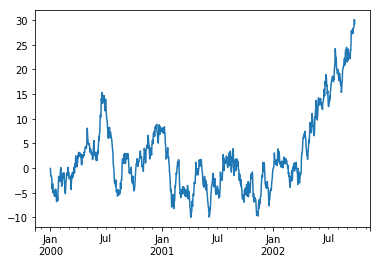

In [17]:
ts.plot()

In [18]:
df.head()

,Path,Directory,Name,CreationTime,LastAccessTime,LastWriteTime,Extension,BaseName,B,depth,CreationTimeRanked,LastAccessTimeRanked,LastWriteTimeRanked,OriginalLocation,Kind,Acronym
0,G:\IS\IS - Shortcut.lnk,G:\IS,IS - Shortcut.lnk,2018-03-15 16:04:43,2018-11-05 09:34:20,2018-03-15 16:04:43,.lnk,IS - Shortcut,538,2,112507.0,141579.0,138248.0,1,Link,"[(, IS)]"
1,G:\IS\Records - Shortcut.lnk,G:\IS,Records - Shortcut.lnk,2017-03-20 17:29:05,2018-11-05 09:34:20,2017-03-21 16:28:14,.lnk,Records - Shortcut,2013,2,65370.0,141579.0,92339.0,1,Link,[]
2,G:\IS\(C) SYSTEM - Shortcut.lnk,G:\IS,(C) SYSTEM - Shortcut.lnk,2016-08-04 13:52:29,2018-11-05 09:34:20,2016-08-04 13:52:29,.lnk,(C) SYSTEM - Shortcut,456,2,61279.0,141579.0,87372.0,1,Link,"[(, SYSTEM)]"
3,G:\IS\eforms sit - Shortcut.lnk,G:\IS,eforms sit - Shortcut.lnk,2017-03-05 09:47:35,2018-11-05 09:34:20,2017-03-05 09:47:35,.lnk,eforms sit - Shortcut,1795,2,65338.0,141579.0,92254.0,1,Link,[]
4,G:\IS\(D) DOF BATCH 3 - Shortcut.lnk,G:\IS,(D) DOF BATCH 3 - Shortcut.lnk,2017-05-12 11:18:32,2018-11-05 09:34:20,2017-05-12 11:18:32,.lnk,(D) DOF BATCH 3 - Shortcut,385,2,65988.0,141579.0,92882.0,1,Link,"[(, DOF), (, BATCH)]"


In [11]:
import seaborn as sns
sns.set()

ValueError: color kwarg must have one color per dataset

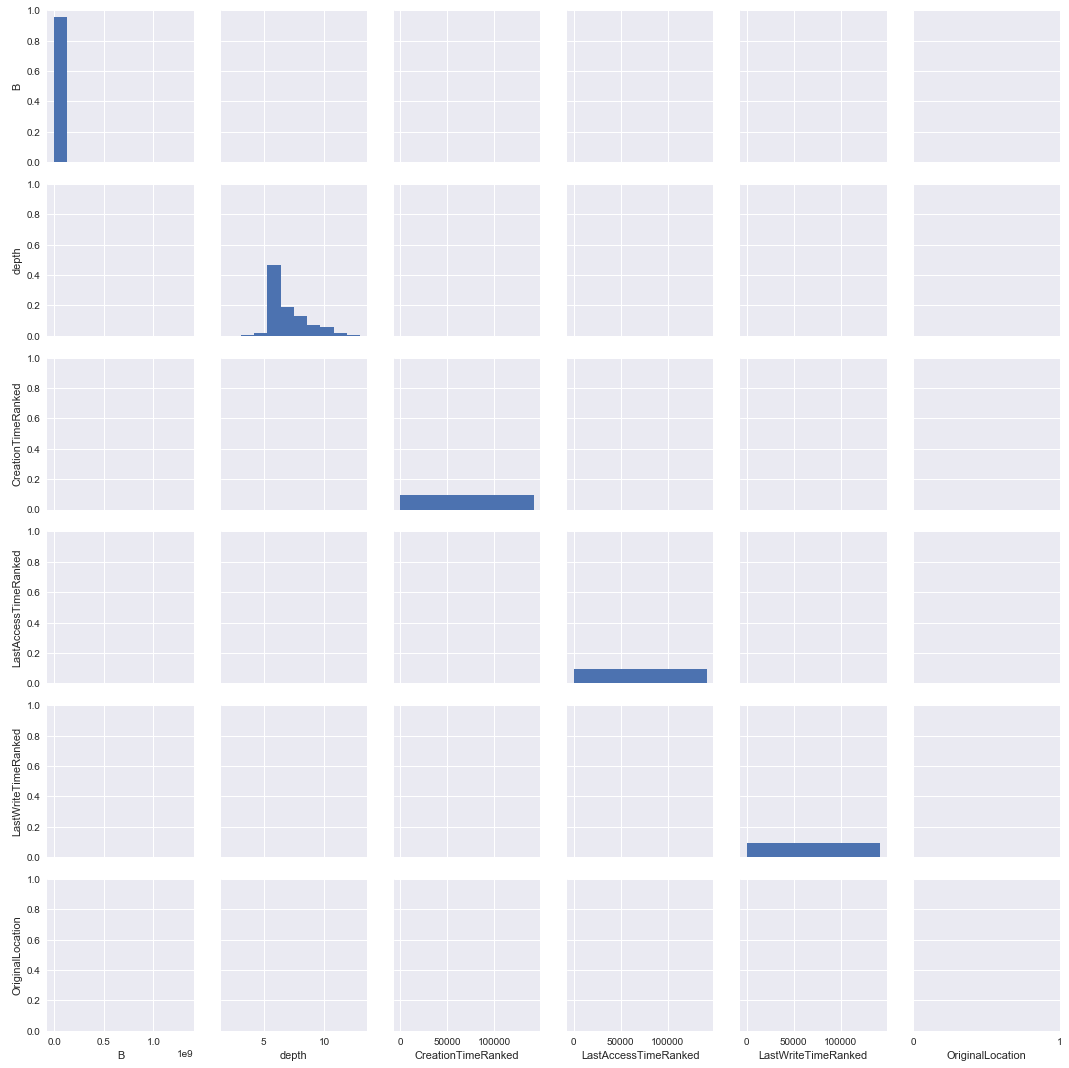

In [22]:
sns.pairplot(df, size=2.5);

In [ ]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

In [5]:
with sns.axes_style('white'):
    g = sns.factorplot("CreationTime", data=df, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

NameError: name 'sns' is not defined

In [4]:
df['CreateYear'] = df['CreationTime'].dt.year
df['LastAccessYear'] = df['LastAccessTime'].dt.year
df['LastWriteYear'] = df['LastWriteTime'].dt.year

In [7]:
df.head()

,Path,Directory,Name,CreationTime,LastAccessTime,LastWriteTime,Extension,BaseName,B,CreateYear,LastAccessYear,LastWriteYear
0,G:\IS\IS - Shortcut.lnk,G:\IS,IS - Shortcut.lnk,2018-03-15 16:04:43,2018-11-05 09:34:20,2018-03-15 16:04:43,.lnk,IS - Shortcut,538,2018,2018,2018
1,G:\IS\Records - Shortcut.lnk,G:\IS,Records - Shortcut.lnk,2017-03-20 17:29:05,2018-11-05 09:34:20,2017-03-21 16:28:14,.lnk,Records - Shortcut,2013,2017,2018,2017
2,G:\IS\(C) SYSTEM - Shortcut.lnk,G:\IS,(C) SYSTEM - Shortcut.lnk,2016-08-04 13:52:29,2018-11-05 09:34:20,2016-08-04 13:52:29,.lnk,(C) SYSTEM - Shortcut,456,2016,2018,2016
3,G:\IS\eforms sit - Shortcut.lnk,G:\IS,eforms sit - Shortcut.lnk,2017-03-05 09:47:35,2018-11-05 09:34:20,2017-03-05 09:47:35,.lnk,eforms sit - Shortcut,1795,2017,2018,2017
4,G:\IS\(D) DOF BATCH 3 - Shortcut.lnk,G:\IS,(D) DOF BATCH 3 - Shortcut.lnk,2017-05-12 11:18:32,2018-11-05 09:34:20,2017-05-12 11:18:32,.lnk,(D) DOF BATCH 3 - Shortcut,385,2017,2018,2017


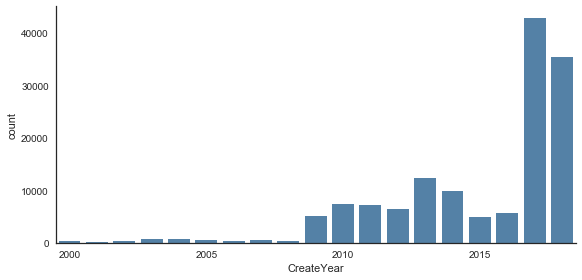

In [19]:
with sns.axes_style('white'):
    g = sns.factorplot("CreateYear", data=df, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

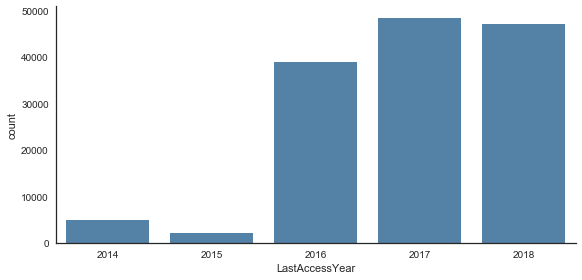

In [21]:
with sns.axes_style('white'):
    g = sns.factorplot("LastAccessYear", data=df, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=1)

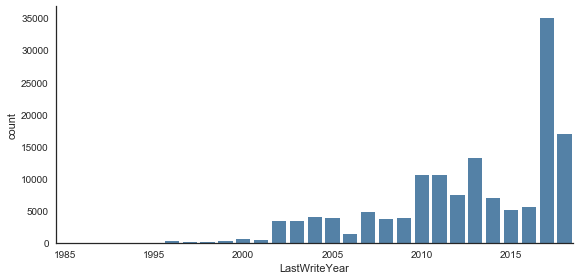

In [23]:
with sns.axes_style('white'):
    g = sns.factorplot("LastWriteYear", data=df, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

In [35]:
del df2
del df3
del df4

NameError: name 'df2' is not defined

In [5]:
#df2 = create new the, could replace a stack. 

df2 = df[['Path', 'CreateYear']].copy()
df3 = df[['Path', 'LastAccessYear']].copy()
df4 = df[['Path', 'LastWriteYear']].copy()




In [21]:
df.head()

,Path,CreateYear,CreateYear
0,G:\IS\IS - Shortcut.lnk,2018,2018
1,G:\IS\Records - Shortcut.lnk,2017,2017
2,G:\IS\(C) SYSTEM - Shortcut.lnk,2016,2016
3,G:\IS\eforms sit - Shortcut.lnk,2017,2017
4,G:\IS\(D) DOF BATCH 3 - Shortcut.lnk,2017,2017


In [6]:

df2['Name'] = 'CreateYear'
df3['Name']  = 'LastAccessYear'
df4['Name']  = 'LastWriteYear'



In [7]:
df2.head()

,Path,CreateYear,Name
0,G:\IS\IS - Shortcut.lnk,2018,CreateYear
1,G:\IS\Records - Shortcut.lnk,2017,CreateYear
2,G:\IS\(C) SYSTEM - Shortcut.lnk,2016,CreateYear
3,G:\IS\eforms sit - Shortcut.lnk,2017,CreateYear
4,G:\IS\(D) DOF BATCH 3 - Shortcut.lnk,2017,CreateYear


In [43]:
del df_new

In [46]:
df_new = pd.merge(df_new, [df2, df3, df4], on='Path')

NameError: name 'df_new' is not defined

In [8]:
df_new = pd.concat([df2, df3, df4])

In [59]:
df2.head()

,Path,Year,Name
0,G:\IS\IS - Shortcut.lnk,2018,CreateYear
1,G:\IS\Records - Shortcut.lnk,2017,CreateYear
2,G:\IS\(C) SYSTEM - Shortcut.lnk,2016,CreateYear
3,G:\IS\eforms sit - Shortcut.lnk,2017,CreateYear
4,G:\IS\(D) DOF BATCH 3 - Shortcut.lnk,2017,CreateYear


In [11]:
df2.columns = ['Path', 'Year', 'Name']
df3.columns = ['Path', 'Year', 'Name']
df4.columns = ['Path', 'Year', 'Name']



In [12]:
df_new3 = df2.append([df3, df4])

In [13]:
df_new3.shape

(424944, 3)

In [14]:
df_new3.head()

,Path,Year,Name
0,G:\IS\IS - Shortcut.lnk,2018,CreateYear
1,G:\IS\Records - Shortcut.lnk,2017,CreateYear
2,G:\IS\(C) SYSTEM - Shortcut.lnk,2016,CreateYear
3,G:\IS\eforms sit - Shortcut.lnk,2017,CreateYear
4,G:\IS\(D) DOF BATCH 3 - Shortcut.lnk,2017,CreateYear


In [ ]:
df = df.cumsum()

In [7]: plt.figure(); df.plot();

In [ ]:
#dframes = [df2,df3,df4]
#for dframe in dframes:
#    df['Name']='abc'

In [20]:
dframes = [df2,df3,df4]
for dframe in dframes:
    print(df.head)

<bound method NDFrame.head of                                                      Path  \
0                                 G:\IS\IS - Shortcut.lnk   
1                            G:\IS\Records - Shortcut.lnk   
2                         G:\IS\(C) SYSTEM - Shortcut.lnk   
3                         G:\IS\eforms sit - Shortcut.lnk   
4                    G:\IS\(D) DOF BATCH 3 - Shortcut.lnk   
5                   G:\IS\Copy of eApprovals Testing.xlsx   
6                       G:\IS\Confluence - eApprovals.url   
7                                          G:\IS\ADS..htm   
8                      G:\IS\Clean Up Guide Generic .docx   
9                             G:\IS\A-SIRA - Shortcut.lnk   
10                                 G:\IS\SOH Records.docx   
11                                      G:\IS\POLICY.docx   
12      G:\IS\Procedure_-_Disposal_-_Destruction_-_201...   
13      G:\IS\State Archives and Records NSW  The Stat...   
14               G:\IS\New Microsoft Excel Worksheet.xl

In [ ]:
df['Name']='abc'

In [13]:
df2.head()

,Path,CreateYear
0,G:\IS\IS - Shortcut.lnk,2018
1,G:\IS\Records - Shortcut.lnk,2017
2,G:\IS\(C) SYSTEM - Shortcut.lnk,2016
3,G:\IS\eforms sit - Shortcut.lnk,2017
4,G:\IS\(D) DOF BATCH 3 - Shortcut.lnk,2017


## 